In [29]:
import emoji
import re
import string
from gensim.parsing.preprocessing import remove_stopwords
from nltk.corpus import stopwords
import spacy
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
import spacy
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from wordcloud import WordCloud

[nltk_data] Downloading package wordnet to C:\Users\Bharath
[nltk_data]     Srinivasan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Bharath
[nltk_data]     Srinivasan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Data Preprocessing

In [3]:
data1=pd.read_csv("cyberbullying_tweets.csv")

<IPython.core.display.Javascript object>

In [4]:
data1['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [5]:
def removePunctuations(df):
    translator = str.maketrans('', '', string.punctuation)
    df["tweet_text"] = df["tweet_text"].apply(lambda x: x.translate(translator))
    return df

In [6]:
def converToLowerCase(df):
    df["tweet_text"]=df["tweet_text"].str.lower()
    return df

In [7]:
def removeUnwantedCharacters(df):
    cleaned_tweets=list()
    for tweet in df['tweet_text']:
        # Remove URLs
        tweet = re.sub(r"http\S+", "", tweet)
        # Remove mentions
        tweet = re.sub(r"@[A-Za-z0-9]+", "", tweet)
        # Remove hashtags
        tweet = re.sub(r"#[A-Za-z0-9]+", "", tweet)
        # Remove special characters
        tweet = re.sub(r"[^a-zA-Z0-9]+", " ", tweet)
        cleaned_tweets.append(tweet)
    df=df.drop("tweet_text",axis=1)
    df['tweet_text']=cleaned_tweets
    return df

In [8]:
def removeEmojis(df):
    deemoji=list()
    for i in df['tweet_text']:
        deemoji.append(emoji.demojize(i))
    df.drop("tweet_text",axis=1)
    df['tweet_text']=deemoji
    return df

In [9]:
def removeStopWords(data):
    stop_words=set(stopwords.words("english"))
    data['tweet_text'] = data['tweet_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
    return data

In [10]:
def lemmatize_df(df):
    lemmatizer = WordNetLemmatizer()
    df["tweet_text"] = df["tweet_text"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
    return df

In [11]:
def lemmatize_column(dataframe):
    lemmatized_values = []
    nlp = spacy.load('en_core_web_sm')
    for value in dataframe["tweet_text"]:
        doc = nlp(value)
        lemmatized_words = [token.lemma_ for token in doc]
        lemmatized_value = ' '.join(lemmatized_words)
        
        lemmatized_values.append(lemmatized_value)
    
    dataframe['lemmatized_' + "temp"] = lemmatized_values

In [12]:
data_cleaned1=removeStopWords(removeEmojis(removeUnwantedCharacters(removePunctuations(converToLowerCase(data1)))))

In [13]:
lemmatize_column(data_cleaned1)

In [14]:
data_cleaned1.to_csv("Lemmatized.csv")

In [15]:
data_cleaned1=data_cleaned1.drop("tweet_text",axis=1)

In [16]:
data_cleaned1

,cyberbullying_type,lemmatized_temp
0,not_cyberbullying,word katandandre food crapilicious mkr
1,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...
2,not_cyberbullying,xochitlsuckkks classy whore red velvet cupcake
3,not_cyberbullying,jasongio meh p thank head concern another angr...
4,not_cyberbullying,rudhoeenglish isis account pretend kurdish acc...
...,...,...
47687,ethnicity,black ppl be not expect anything depend anythi...
47688,ethnicity,turner withhold disappointment turner call cou...
47689,ethnicity,swear god dumb nigger bitch get bleach hair re...
47690,ethnicity,yea fuck rt therealexel you re nigger fucking ...


## Data Visualization

As we can see from the below bar plot, the data is balanced where every category equally contributes.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

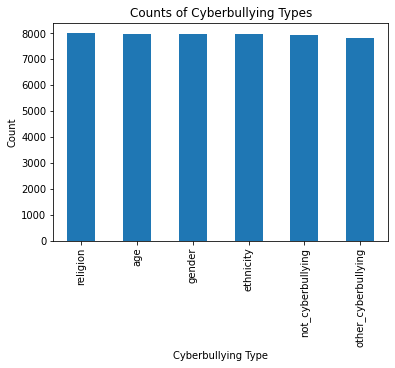

In [17]:
counts = data1['cyberbullying_type'].value_counts()
counts.plot(kind='bar')
plt.title('Counts of Cyberbullying Types')
plt.xlabel('Cyberbullying Type')
plt.ylabel('Count')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

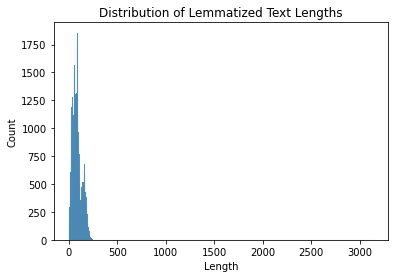

In [20]:
lengths = data_cleaned1['lemmatized_temp'].str.len()
sns.histplot(data=lengths)
plt.title('Distribution of Lemmatized Text Lengths')
plt.xlabel('Length')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

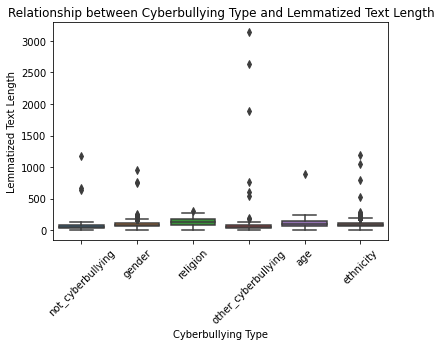

In [28]:
sns.boxplot(x='cyberbullying_type', y=data_cleaned1['lemmatized_temp'].str.len(), data=data_cleaned1)
plt.title('Relationship between Cyberbullying Type and Lemmatized Text Length')
plt.xlabel('Cyberbullying Type')
plt.ylabel('Lemmatized Text Length')
plt.xticks(rotation=45)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

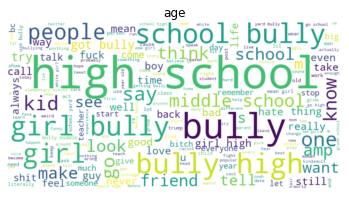

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

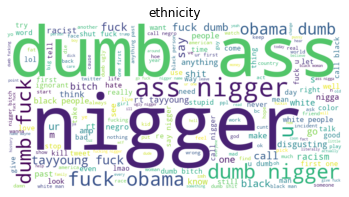

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

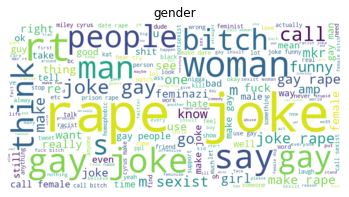

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

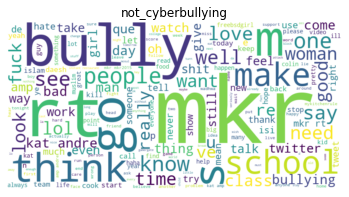

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

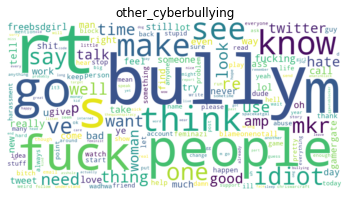

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

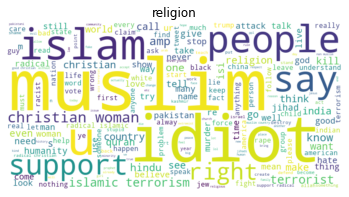

In [34]:
groups = data_cleaned1.groupby('cyberbullying_type')
for group_name, group_data in groups:
    text = ' '.join(group_data['lemmatized_temp'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(6, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(group_name)
    plt.show()

In [19]:
text_tokens=data_cleaned1['lemmatized_temp']
text_tokens

0                   word katandandre food crapilicious mkr
1        aussietv white mkr theblock imacelebrityau tod...
2           xochitlsuckkks classy whore red velvet cupcake
3        jasongio meh p thank head concern another angr...
4        rudhoeenglish isis account pretend kurdish acc...
                               ...                        
47687    black ppl be not expect anything depend anythi...
47688    turner withhold disappointment turner call cou...
47689    swear god dumb nigger bitch get bleach hair re...
47690    yea fuck rt therealexel you re nigger fucking ...
47691    bro u get to chill rt chillshrammy dog fuck kp...
Name: lemmatized_temp, Length: 47692, dtype: object

## Tokenization

In [41]:
num_words = 10000

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(text_tokens)

sequences = tokenizer.texts_to_sequences(text_tokens)

In [42]:
max_seq_length = np.max(list(map(lambda x: len(x), sequences)))

print("Max sequence length:", max_seq_length)

<IPython.core.display.Javascript object>

Max sequence length: 404


In [43]:
inputs = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

## Label Encoding 

In [44]:
le = LabelEncoder()
data_cleaned1['cyberbullying_type']=le.fit_transform(data_cleaned1['cyberbullying_type'])

## Train-Test Split

In [45]:
train_inputs, test_inputs, train_labels, test_labels = train_test_split(inputs, data_cleaned1['cyberbullying_type'], train_size=0.7, random_state=100)

## Model

In [47]:
inputs = tf.keras.Input(shape=(train_inputs.shape[1],))

embedding = tf.keras.layers.Embedding(
    input_dim=10000,
    output_dim=64
)(inputs)

flatten = tf.keras.layers.Flatten()(embedding)

dense_1 = tf.keras.layers.Dense(128, activation='relu')(flatten)
dense_2 = tf.keras.layers.Dense(128, activation='relu')(dense_1)

outputs = tf.keras.layers.Dense(6, activation='softmax')(dense_2)


model = tf.keras.Model(inputs, outputs)

print(model.summary())
tf.keras.utils.plot_model(model)



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 404)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 404, 64)           640000    
                                                                 
 flatten_3 (Flatten)         (None, 25856)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               3309696   
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 6)                 774       
                                                                 
Total params: 3,966,982
Trainable params: 3,966,982
Non-tra

In [33]:
embedding_dim = 128

inputs = tf.keras.Input(shape=(max_seq_length,))

embedding = tf.keras.layers.Embedding(
    input_dim=num_words,
    output_dim=embedding_dim,
    input_length=max_seq_length
)(inputs)

gru = tf.keras.layers.Bidirectional(
    tf.keras.layers.GRU(128, return_sequences=True)
)(embedding)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(flatten)


model = tf.keras.Model(inputs, outputs)



In [48]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_inputs,
    train_labels,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
835/835 [==============================] - 32s 38ms/step - loss: 0.7065 - accuracy: 0.6919 - val_loss: 0.4223 - val_accuracy: 0.8188
Epoch 2/100
835/835 [==============================] - 32s 39ms/step - loss: 0.3423 - accuracy: 0.8558 - val_loss: 0.4145 - val_accuracy: 0.8255
Epoch 3/100
835/835 [==============================] - 31s 37ms/step - loss: 0.2473 - accuracy: 0.8983 - val_loss: 0.4660 - val_accuracy: 0.8240
Epoch 4/100
835/835 [==============================] - 31s 37ms/step - loss: 0.1780 - accuracy: 0.9278 - val_loss: 0.5389 - val_accuracy: 0.8153
Epoch 5/100
835/835 [==============================] - 31s 38ms/step - loss: 0.1323 - accuracy: 0.9465 - val_loss: 0.6208 - val_accuracy: 0.8055


## Results

In [50]:
print("Test Accuracy: {:.2f}%".format(model.evaluate(test_inputs, test_labels, verbose=0)[1] * 100))

Test Accuracy: 83.07%


In [56]:
y_pred = np.argmax(model.predict(test_inputs), axis=1)
cm = confusion_matrix(test_labels, y_pred)
clr = classification_report(test_labels, y_pred, target_names=['age',
 'ethnicity',
 'gender',
 'not_cyberbullying',
 'other_cyberbullying',
 'religion'])
print("Classification Report:\n----------------------\n", clr)

<IPython.core.display.Javascript object>

Classification Report:
----------------------
                      precision    recall  f1-score   support

                age       0.96      0.97      0.97      2378
          ethnicity       0.97      0.97      0.97      2443
             gender       0.86      0.87      0.87      2406
  not_cyberbullying       0.60      0.57      0.59      2370
other_cyberbullying       0.62      0.63      0.62      2324
           religion       0.94      0.97      0.95      2387

           accuracy                           0.83     14308
          macro avg       0.83      0.83      0.83     14308
       weighted avg       0.83      0.83      0.83     14308

